## NAME : MARY WAIRIMU
## PHASE 3 PROJECT 
## PROJECT INSTRUCTOR :

## SyriaTel Customer Churn Prediction

### 1) Business Understanding

### Predicting and preventing customer churn represents a huge additional potential revenue source for every business .Customer churn (also known as customer attrition) refers to when a customer ( subscriber, user, etc.) ceases his or her relationsh ip with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. The full cost of churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reducing churn is a key business goal of every online business that also includes the telecom

### The ability to predict that a particular customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every online business. Besides the direct loss of revenue that results from a customer abandoning the business, the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. (In other words, acquiring that customer may have actually been a losing investment.) Furthermore, it is always more difficult and expensive to acquire a new customer than it is to retain a current paying custome

## 2)Data Understanding

#### The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

##### We will first load our datasets that happens after our importing all necessary libraries¶

In [2]:
# Here we will import various packages that we will work with through out the project 
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

In [3]:
# We load them into a dataframe and display the first five 
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Now let's understand our data more

In [3]:
# To give us the number of rows and columns present
df.shape

(3333, 21)

In [4]:
# To give the statistical description for the numerical features
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Data Preparation/Data Cleaning 

##### Checking for missing values

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no missing values

##### Checking for duplicates

In [6]:
#finding total number of duplicates
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


In [4]:
# Replace the spaces in the column names with underscores
df.columns = [s.replace(" ", "_") for s in df.columns]

In [5]:
# The "phone number" column is removed, because every customer has its own phone number 
df = df.drop(["phone_number"], axis=1)
df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


### Explanatory Data Analysis(EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

#### The categorical columns

In [10]:
df.select_dtypes(include="object").head()

,state,international_plan,voice_mail_plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


#### The numerical features

In [11]:
df.select_dtypes(include=["int64","float64"]).head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
# Check the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account_length             212
area_code                    3
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

In [7]:
# We Create numeric & categorical lists as seen from above that shall be used later
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area_code','international_plan','voice_mail_plan']

##### Numerical columns visualisations

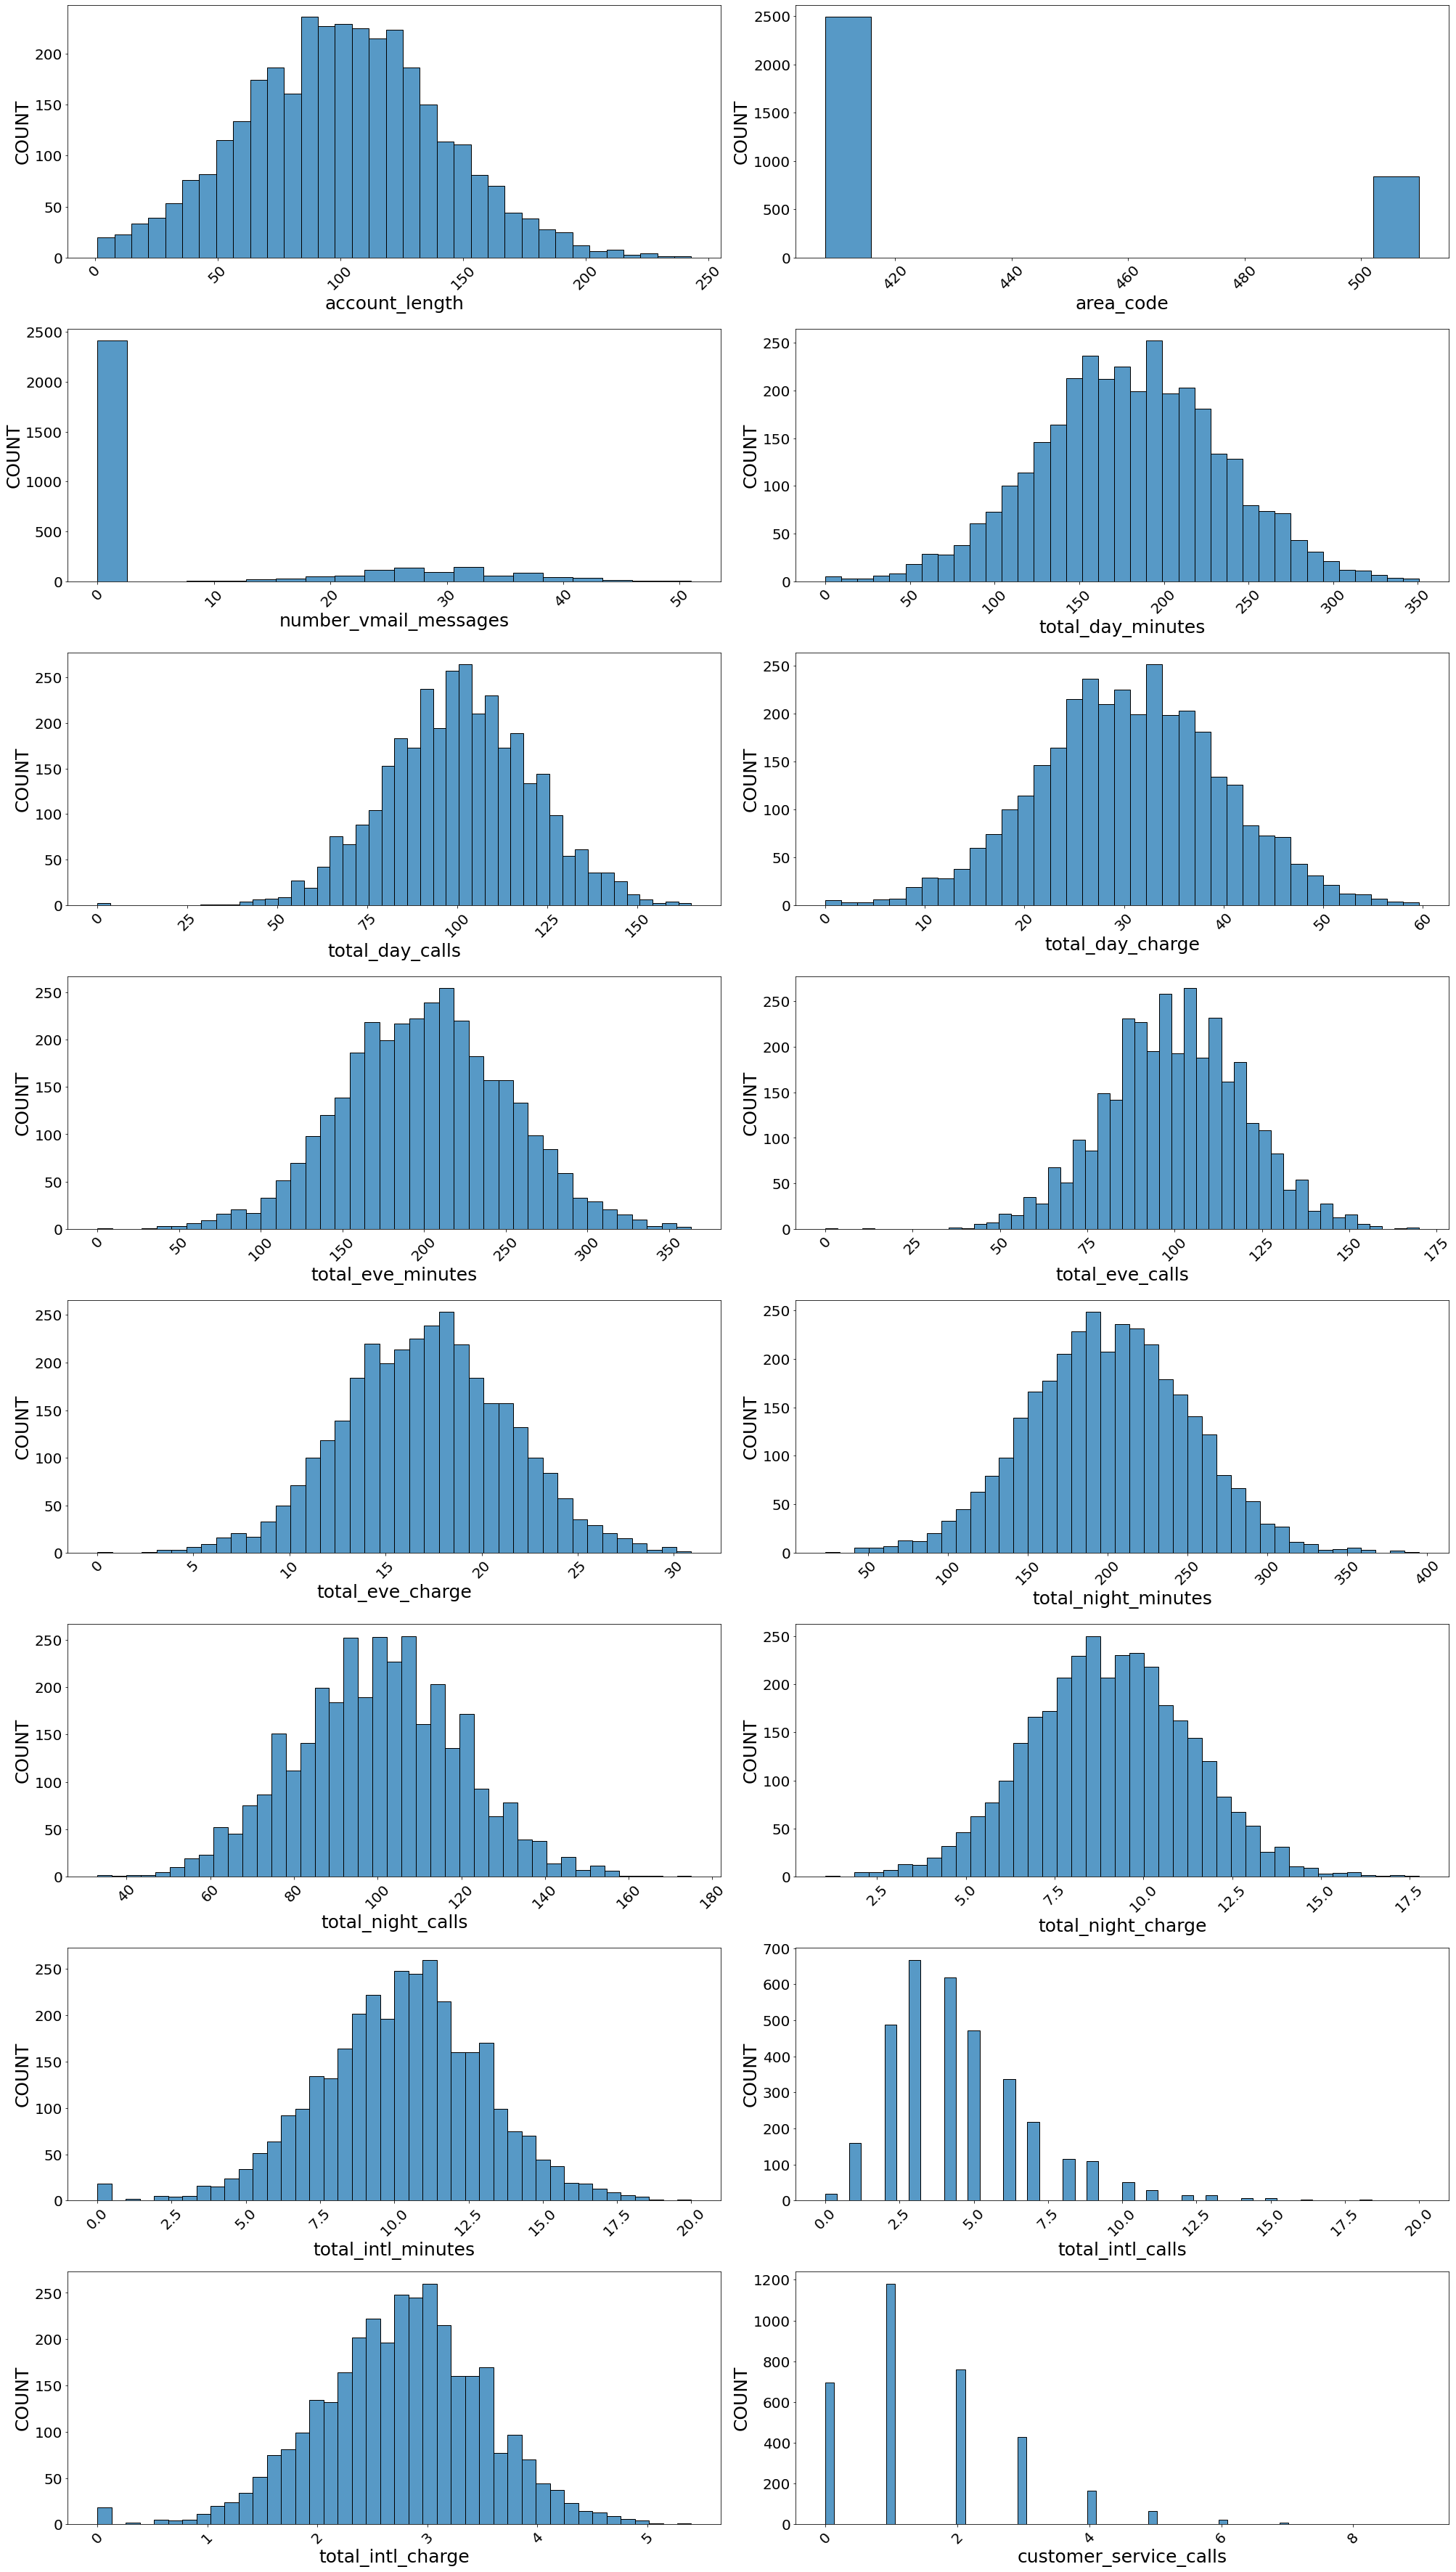

In [14]:
# We plot histograms for all the numerical cols against their count
fig = plt.figure(figsize=(28,160))
num_vars = df.select_dtypes(['int64', 'float64']).columns.tolist()
# num_vars.remove('id')
for index, col in enumerate(num_vars):
    plt.subplot(26,2,index+1)
    sns.histplot(x=col, data=df)
    plt.ylabel('COUNT', size = 25)
    plt.xlabel(col, fontsize = 25)
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
fig.tight_layout(pad=1.0)

For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.
Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

#### Let's find out more about our target : 1) churn

In [15]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

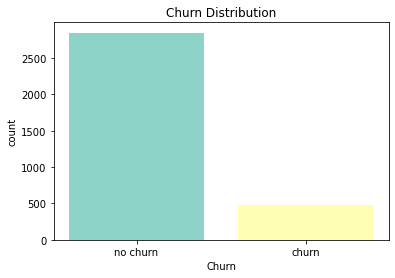

In [16]:
df = df

# Define churn values and their corresponding labels
churn_dict = {0: "no churn", 1: "churn"}

# Calculate churn counts
y = df["churn"].value_counts()

# Create a list of labels for the x-axis
x_labels = [churn_dict[x] for x in y.index]

# Define colors for the bars
colors = plt.cm.Set3(np.arange(len(y)))

# Create the bar plot
plt.bar(x_labels, y.values, color=colors)

# Customize the plot
plt.xlabel('Churn')
plt.ylabel('count')
plt.title('Churn Distribution')

# Display the plot
plt.show()

We can see that we have clearly more samples for customers without churn than for customers with churn. So we have a class imbalance for the target variable which could lead to predictive models which are biased towards the majority (i.e. no churn). In order to deal with this issue we will investigate into the use of oversampling when building the models

#### 2) the customer service calls

In [17]:
df['customer_service_calls'].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: customer_service_calls, dtype: float64

So a customer makes an average of 1.6 calls to customer service. let's go ahead and try to identify if there's a relationship between the amount of customer service calls and the number of days their account has been open

In [18]:
cust_serv = df.groupby(['customer_service_calls'])['churn', 'account_length'].mean()
cust_serv

C:\Users\Nima\AppData\Local\Temp\ipykernel_1620\3884943013.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust_serv = df.groupby(['customer_service_calls'])['churn', 'account_length'].mean()


,churn,account_length
customer_service_calls,,
0,0.131994,101.302726
1,0.103302,101.779848
2,0.114625,99.225296
3,0.102564,101.433566
4,0.457831,102.662651
5,0.606061,102.560606
6,0.636364,90.181818
7,0.555556,116.111111
8,0.500000,83.500000


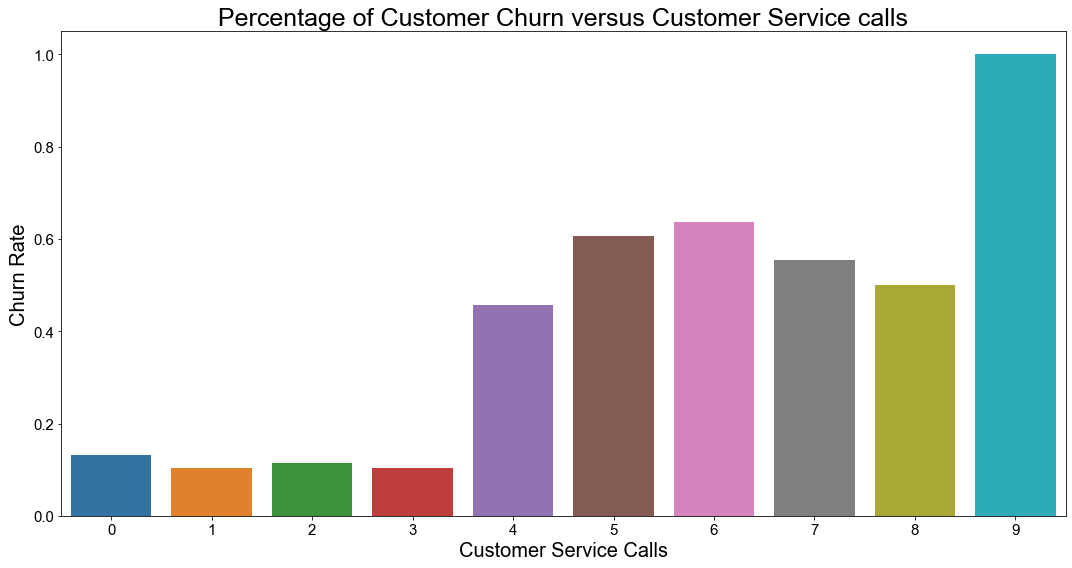

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y = 'churn', data = cust_serv, ax = ax)
plt.title('Percentage of Customer Churn versus Customer Service calls', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Customer Service Calls', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
sns.set_style('white')
plt.savefig('customer_service_churn.png')

#### 3) :Total Day Minutes

In [20]:
df['total_day_minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total_day_minutes, dtype: float64

C:\Users\Nima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


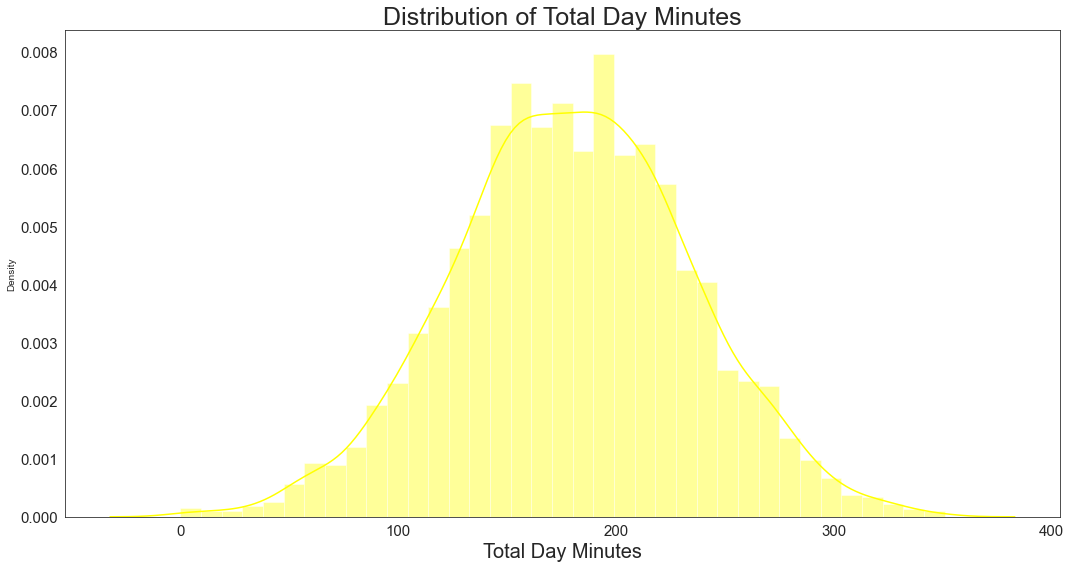

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
sns.distplot(df['total_day_minutes'] ,ax = ax, color = 'yellow')
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.tight_layout()

The total day minutes are seen to have a normal distribution with the most minutes being on the range 150 and 250 minutes

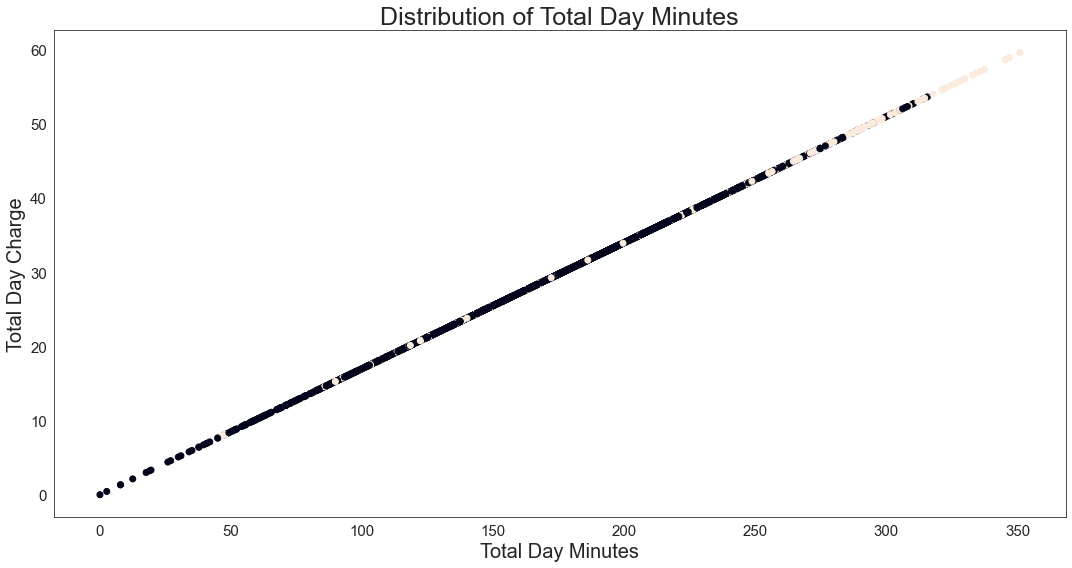

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Distribution of Total Day Minutes', fontsize = 25)
plt.scatter(df['total_day_minutes'], df['total_day_charge'], c = df.churn)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Total Day Minutes', fontsize = 20)
plt.ylabel('Total Day Charge', fontsize = 20)
plt.tight_layout()
sns.set_style('white')
plt.savefig(' total_minutes.png')

The total day minutes is seen to have a very strong linear relationship with the total charge thus showing that an increase in minutes results to an increase in the day charges. And on a decrease in the total days charge then the minutes have reduced.

#### 4) : International plan

In [23]:
df['international_plan'].describe()

count     3333
unique       2
top         no
freq      3010
Name: international_plan, dtype: object

In [24]:
int_churn = df.groupby(['international_plan'])['churn', 'customer_service_calls'].mean()
int_churn

C:\Users\Nima\AppData\Local\Temp\ipykernel_1620\3882594936.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  int_churn = df.groupby(['international_plan'])['churn', 'customer_service_calls'].mean()


,churn,customer_service_calls
international_plan,,
no,0.114950,1.573422
yes,0.424149,1.464396


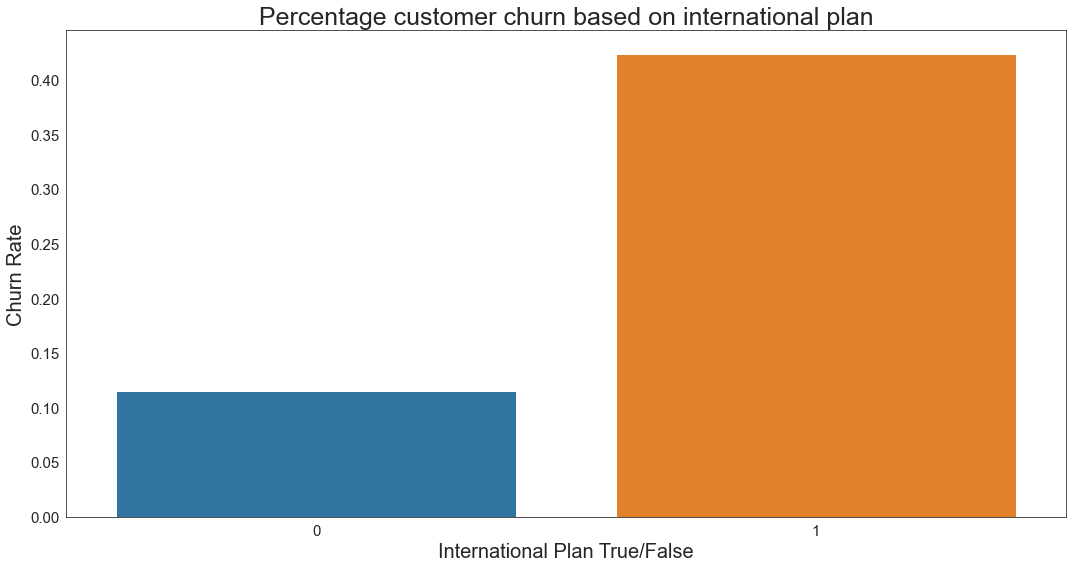

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = [0, 1], y = 'churn', data = int_churn, ax = ax)
plt.title('Percentage customer churn based on international plan', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('International Plan True/False', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
plt.tight_layout()
sns.set_style('white')
plt.savefig('int_plan_churn.png')

##### 5) Area Code

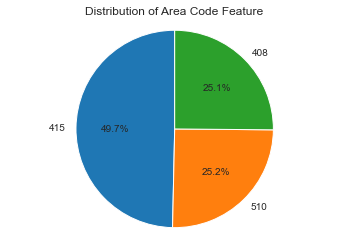

In [26]:
# # Pie chart of area code feature
import matplotlib.pyplot as plt

# Calculate the value counts for the 'area_code' feature
area = df['area_code'].value_counts()

# Get the transaction names and quantities
transuction = area.index
quantity = area.values

# Set up the pie chart figure
figure, ax = plt.subplots()

# Create the pie chart
ax.pie(quantity, labels=transuction, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal, creating a circular pie
ax.axis('equal')

# Set the title for the pie chart
plt.title('Distribution of Area Code Feature')

# Display the pie chart
plt.show()


Half of the customers have the area code 415.
One fourth of customers have the area code 510 and another fourth have the area code 408.

In [27]:
# To test correlations with the churn column
df.corr().churn.sort_values(ascending = False)
# So the highest correlations with churn are: international plan, customer_service_calls, total_day_minutes, total_day_charge

churn                     1.000000
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
total_eve_minutes         0.092796
total_eve_charge          0.092786
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
area_code                 0.006174
total_night_calls         0.006141
total_intl_calls         -0.052844
number_vmail_messages    -0.089728
Name: churn, dtype: float64

In [28]:
# high_corrs = ['churn', 'international_plan', 'customer_service_calls', 'total_day_minutes', 'total_day_charge']
# sns.pairplot(df[high_corrs])

From the correlation it is evident that the total day charge and the total day minutes a very highly correlated. Probably, this Telecom company charges per minute. The same behavior can be seen for the evening, the night and the international calls. The highest correlation with the churn variable have the international plan, the total_day_charge, the total_day_minutes and the number of customer service calls.
There seems to be a evident relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service

##### The heat map helps identify the correlation between the diffrent variables

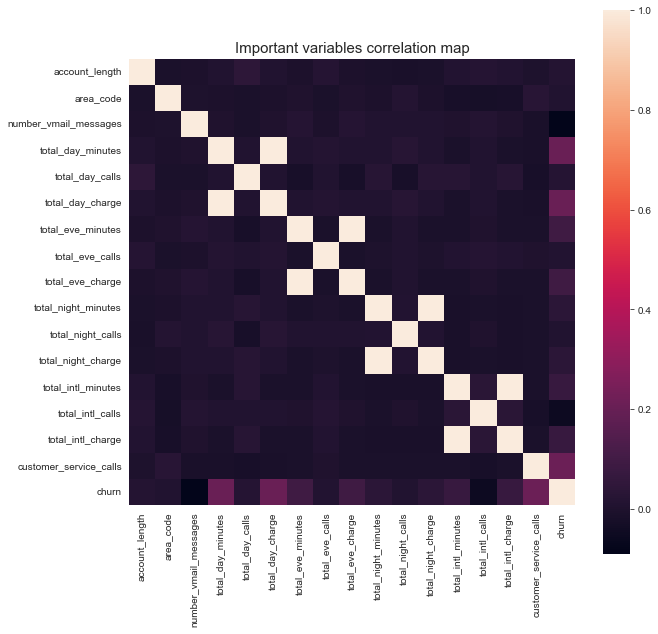

In [29]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

We can see a high correlation between the voice mail plan and the number of voice mail messages. It makes sense that customers with the voice mail plan also send more voice mail messages. However, the international plan is just slightly correlated with the total international minutes and the international charge. As seen also in our previous analysis, the total day charge and the total day minutes a very highly correlated. Probably, this Telecom company charges per minute. The same behavior can be seen for the evening, the night and the international calls. The highest correlation with the churn variable have the international plan, the total_day_charge, the total_day_minutes and the number of customer service calls

##### categorical columns visualisations

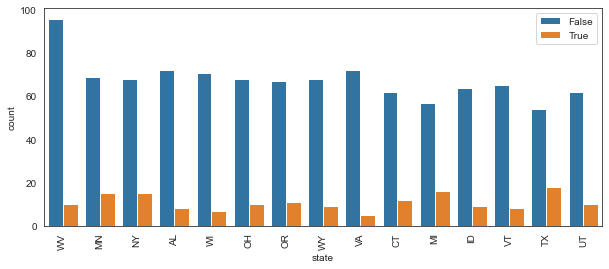

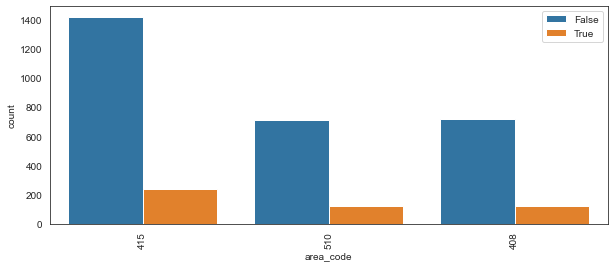

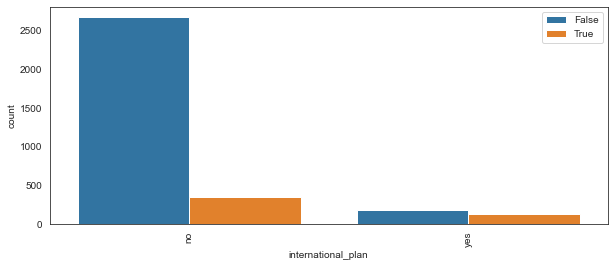

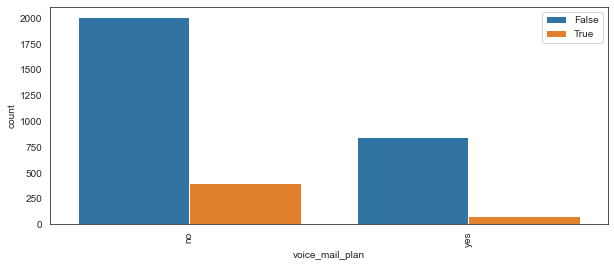

In [30]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()
    

##### Check for outliers

In [8]:

# calculates the quartiles, IQR, and lower/upper bounds for each numerical column. It then filters the dataframe to include only the rows where each column value is within the specified bounds
def drop_numerical_outliers_iqr(df, multiplier=1.5):
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = drop_numerical_outliers_iqr(df)
print("After dropping numerical outliers, length of the dataframe is:", len(df))


After dropping numerical outliers, length of the dataframe is: 2797


In [10]:

to_drop = []
corr_matrix = df.corr().abs()

# Drop highly correlated features (r > 0.90)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.90:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)

df2 = df.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(df2.shape[1]))


The reduced dataframe has 16 columns.


In [13]:

df['churn'] = df['churn'].astype(int)
df2 = df.copy()  # Create a copy of the dataframe

df2['churn'] = df2['churn'].replace({False: 0, True: 1})
df2.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


Conduct One Hot Encoding for the categorical features

In [14]:
dummy_df_state = pd.get_dummies(df2["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(df2["area_code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(df2["international_plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(df2["voice_mail_plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


df2 = pd.concat([df2,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
df2 = df2.loc[:,~df2.columns.duplicated()]
df2 = df2.drop(['state','area_code','international_plan','voice_mail_plan'],axis=1)

df2.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,1,1,0


We will now perform scaling it is is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation issues will be solved.
MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below. 

In [15]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df2[columns].values.reshape(-1,1))

for i in df2.select_dtypes(include=[np.number]).columns:
    df2[i] = scaling(i)
df2.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,0.622549,0.50,0.798455,0.600000,0.798430,0.486667,0.481132,0.486710,0.665428,0.413462,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.519608,0.52,0.435042,0.723810,0.434944,0.479630,0.518868,0.479739,0.701487,0.528846,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.666667,0.00,0.722261,0.638095,0.722222,0.204444,0.584906,0.204357,0.360223,0.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.362745,0.00,0.452949,0.628571,0.452912,0.304815,0.698113,0.305011,0.450558,0.701923,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.573529,0.00,0.652037,0.485714,0.652003,0.572593,0.500000,0.572549,0.513755,0.673077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


We will split our df2 into two sample one for training and the other smaller one for testing

In [16]:
# The dataset has a 80% for training(the larger) and 20 %(for testing)
X=df2.drop(['churn'],axis=1)
y=df2['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [17]:
# Apply smote to solve the imbalance and also prevent overfitting
# The technique aims to balance class distribution by randomly increasing minority class examples 
df2.churn.value_counts()

0.0    2493
1.0     304
Name: churn, dtype: int64

In [23]:
# The RandomOverSampler sets the random_state parameter to 123 for reproducibility.
# we use fit_resample method is used to perform the oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=123)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))



Before OverSampling, the shape of X_train: (2237, 71)
After OverSampling, the shape of X_train_over: (3976, 71)


In [20]:
y_train_over.value_counts()

0.0    1988
1.0    1988
Name: churn, dtype: int64

### MODELLING

### Model 1 : Gradient Boosting Classifier

In [24]:

gbm_model = GradientBoostingClassifier() 
gbm_model.fit(X_train_over,y_train_over) 
y_pred_gbm = gbm_model.predict(X_test)

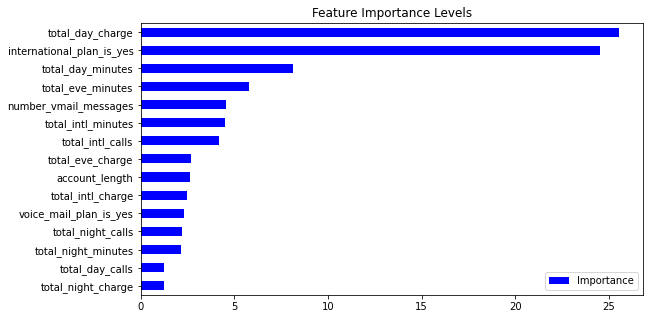

In [49]:
Importance =pd.DataFrame({"Importance": gbm_model.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "blue",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

For the evaluation of the classifiers on the different datasets, a hold-out test set is used, which has 20% of all the data. To account for the class imbalance of our target variable, we use the f1-score as our main evaluation metric. We define:

TP = #samples for which the prediction is positive and the true label is positive
FP = #samples for which the prediction is positive but the true label is negative 
TN = #samples for which the prediction is negative and the true label is negative
FN = #samples for which the prediction is negative but the true label is positive 
Then we define the following:

Precision = TP/(TP+FP) Recall = TP/(TP+FN) Thus giving us an f score of 2((precision*recall)/(precison+recall))

GRADIENT BOOSTING CLASSIFIER MODEL RESULTS 
Accuracy score for testing set:  0.93929
F1 score for testing set:  0.71667
Recall score for testing set:  0.78182
Precision score for testing set:  0.66154


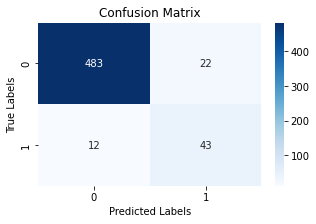

In [28]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score ,confusion_matrix
print("GRADIENT BOOSTING CLASSIFIER MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_gbm),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_gbm),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_gbm),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_gbm),5))
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_gbm, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

### Model 2 : KNN

K-Nearest Neighbors (KNN): KNN is a non-parametric algorithm that classifies new data points based on the majority vote of their k nearest neighbors in the training data.
The  algorithm can compete with the most accurate models because it makes highly accurate predictions

In [29]:
# We import the library
from sklearn.neighbors import KNeighborsClassifier
# Instantiate
knn_model = KNeighborsClassifier()
# fitting 
knn_model.fit(X_train_over, y_train_over)
# make predictions
y_pred_knn = knn_model.predict(X_test)


now let us evaluate our model

In [ ]:
 We first use  the accuracy, precision,recall scores

In [30]:
print("KNN MODEL RESULTS")
print('Accuracy score for testing set: ', round(accuracy_score(y_test, y_pred_knn), 5))
print('F1 score for testing set: ', round(f1_score(y_test, y_pred_knn), 5))
print('Recall score for testing set: ', round(recall_score(y_test, y_pred_knn), 5))
print('Precision score for testing set: ', round(precision_score(y_test, y_pred_knn), 5))




KNN MODEL RESULTS
Accuracy score for testing set:  0.77857
F1 score for testing set:  0.28736
Recall score for testing set:  0.45455
Precision score for testing set:  0.21008


Let us try the confusion matrix

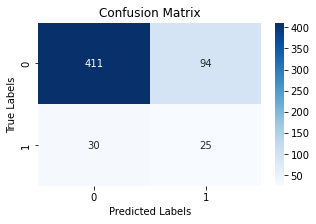

In [31]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
f, ax = plt.subplots(1, 1, figsize=(5, 3))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

#### Model 3 : Random Forest Classifier

In [32]:
# fitting the data & getting predictions 
rf_model = RandomForestClassifier() 
rf_model.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model.predict(X_test)

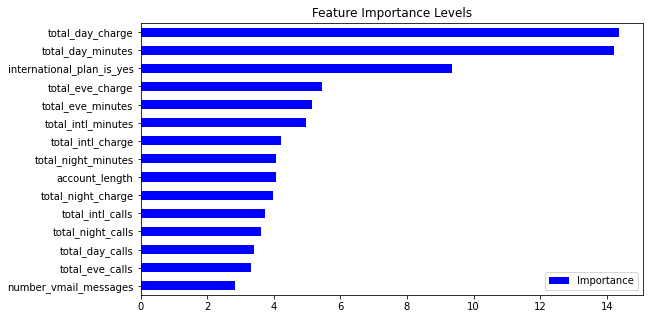

In [40]:
# Importance =pd.DataFrame({"Importance": rf_model.feature_importances_*100},index = X_train_over.columns)
# Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "green",figsize=(9, 5))
# plt.title("Feature Importance Levels");
# plt.show()
# plt.savefig('random_feature.png')
importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100}, index=X_train_over.columns)
importance_sorted = importance.sort_values(by="Importance", axis=0, ascending=True).tail(15)
importance_sorted.plot(kind="barh", color="blue", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.savefig('random_feature.png')
plt.show()


In [35]:
from sklearn.metrics import classification_report , f1_score,recall_score,precision_score ,confusion_matrix
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       505
           1       0.83      0.64      0.72        55

    accuracy                           0.95       560
   macro avg       0.90      0.81      0.85       560
weighted avg       0.95      0.95      0.95       560



RANDOM FOREST MODEL RESULTS
Accuracy score for testing set:  0.95179
F1 score for testing set:  0.72165
Recall score for testing set:  0.63636
Precision score for testing set:  0.83333


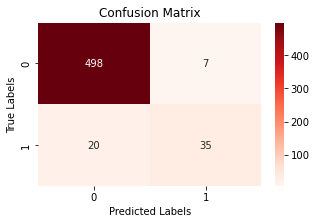

In [36]:
print("RANDOM FOREST MODEL RESULTS")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

According to the random forest classifier, total day charge, and "international plan is yes" features have the highest impact on the model.
Accuracy and F1 score are high for this model, which is good news

### Model 4 : Decision Tree Classifier

They are Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [37]:
#  fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

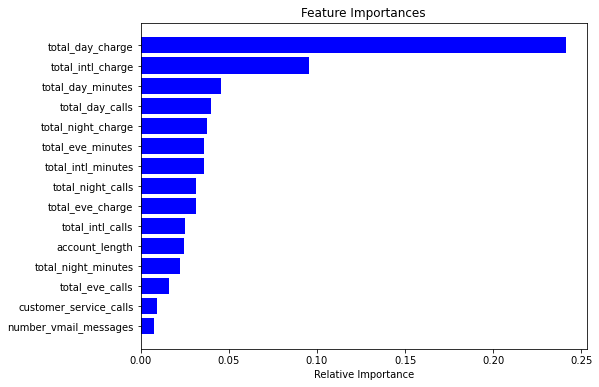

In [39]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       505
           1       0.52      0.64      0.57        55

    accuracy                           0.91       560
   macro avg       0.74      0.79      0.76       560
weighted avg       0.92      0.91      0.91       560



DECISION TREE CLASSIFIER MODEL RESULTS  
Accuracy score for testing set:  0.90714
F1 score for testing set:  0.57377
Recall score for testing set:  0.63636
Precision score for testing set:  0.52239


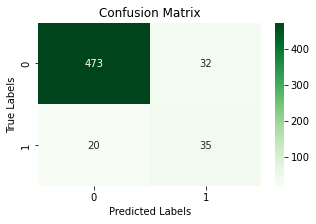

In [42]:
print("DECISION TREE CLASSIFIER MODEL RESULTS  ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

 customer service calls total day charge and total evening charge are the three most important for the model.
The accuracy and F1 score for this model is not as great as model 3.

### Model 5 : Logistic Regression Classifier

In [43]:
#  fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

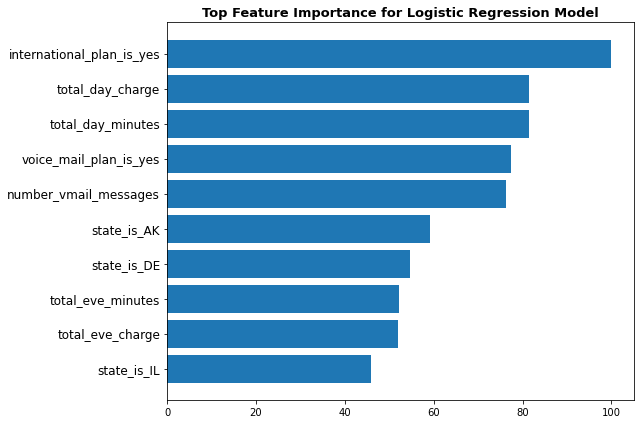

In [45]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-10:]
pos = np.arange(sorted_idx.shape[0]) + 0.5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Top Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()


In [46]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       505
           1       0.31      0.75      0.43        55

    accuracy                           0.81       560
   macro avg       0.64      0.78      0.66       560
weighted avg       0.90      0.81      0.84       560



LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS
Accuracy score for testing set:  0.80893
F1 score for testing set:  0.43386
Recall score for testing set:  0.74545
Precision score for testing set:  0.30597


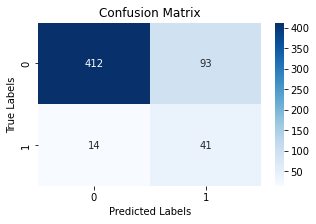

In [47]:
print("LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

According to the logistic regression classifier model,international plan yes , total day charge,total day minutes, number of voicemail messages  are the top  important features.
Model accuracy is 80.5%, which isn't bad. F1 score is only 43.3% which means the test will only be accurate half the times it is ran.

### ROC Curve analysis

C:\Users\Nima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Nima\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed 

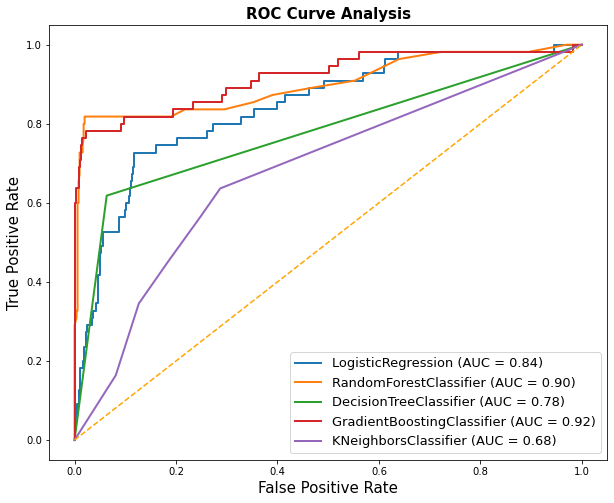

In [50]:
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               KNeighborsClassifier()]

# Create an empty list to store the results
result_table = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    result_table.append((cls.__class__.__name__, model))

# Plot the ROC curves
fig = plt.figure(figsize=(10,8))
for clf_name, model in result_table:
    plot_roc_curve(model, X_test, y_test, name=clf_name, ax=plt.gca(), lw=2)

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


 The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case

The RandomClassifier is a perfect model except if we consider the recall score 
with the recall the models 1) Gradient Boosting Classifier at 0.78
                           2) Random Classifeir at 0.65
                           3) Decision Tree Classifier at 0.63
                           4)  logistic Regression at 0.74
                           5) kNeighborsClassifier at 0.45
The GradientBoostingClassifier is seen to work best with the Recall score of 78

#### Hyperparameter Tuning of Random Forest Classifier

3-Fold Cross validated GridSearchCV hyperparameter tuning technique is used

In [51]:
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [52]:
from sklearn.model_selection import GridSearchCV
# rf_model2 = RandomForestClassifier()
# rf_cv_model = GridSearchCV(rf_model2,rf_params,cv=3,n_jobs=-1,verbose=False)
# rf_cv_model.fit(X_train_over,y_train_over)
# print("Best parameters:"+str(rf_cv_model.best_params_))

In [53]:
rf_model_final = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy')
rf_model_final.fit(X_train_over,y_train_over)
y_pred_final = rf_model_final.predict(X_test)

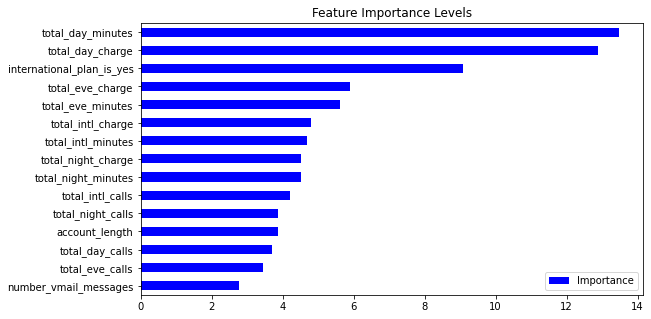

In [55]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "blue",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [56]:
print(classification_report(y_test, y_pred_final, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       505
           1       0.87      0.73      0.79        55

    accuracy                           0.96       560
   macro avg       0.92      0.86      0.89       560
weighted avg       0.96      0.96      0.96       560



HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS 
Accuracy score for testing set:  0.91929
F1 score for testing set:  0.75
Recall score for testing set:  0.74419
Precision score for testing set:  0.75591


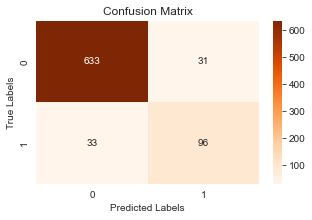

In [62]:
print("HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final),5))
cm_rf = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

#### Hyperparameter Tuning of Geadient Boost  Classifier

In [57]:
# For the gradientBoostClassifier we usea diffrent criterion
gbm_model_final = GradientBoostingClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='friedman_mse')
gbm_model_final.fit(X_train_over,y_train_over)
y_pred_final2 = gbm_model_final.predict(X_test)

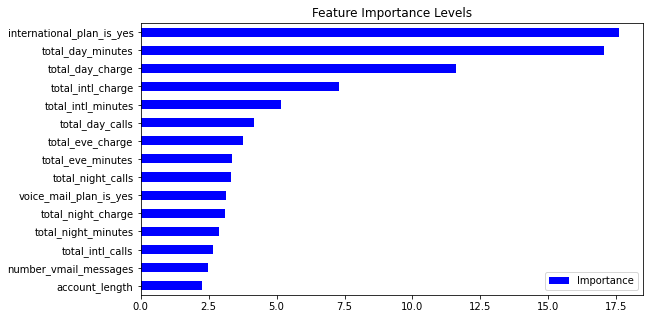

In [58]:
Importance =pd.DataFrame({"Importance": gbm_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "blue",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [59]:
print(classification_report(y_test, y_pred_final2, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       505
           1       0.57      0.64      0.60        55

    accuracy                           0.92       560
   macro avg       0.77      0.79      0.78       560
weighted avg       0.92      0.92      0.92       560



HYPERPARAMETER TUNED GRADIENT BOOSTING MODEL RESULTS 
Accuracy score for testing set:  0.91786
F1 score for testing set:  0.60345
Recall score for testing set:  0.63636
Precision score for testing set:  0.57377


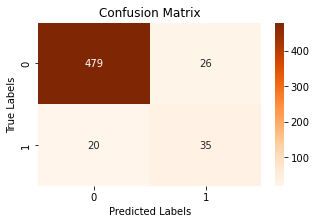

In [60]:
print("HYPERPARAMETER TUNED GRADIENT BOOSTING MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final2),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final2),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final2),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final2),5))
cm_rf = confusion_matrix(y_test, y_pred_final2)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();